In [397]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's create some artificial data.

In [402]:
from sklearn import datasets
n = 45

X0,y0 = datasets.make_moons(n_samples=n, noise = 2e-2)
X1,y1 = datasets.make_circles(n_samples=n, noise = 1e-2)

X1 = 1.8 + X1
y1 = 2+ y1 # for label colors only
X = np.concatenate([X0,X1],axis=0)
y = np.concatenate([y0,y1],axis=0)



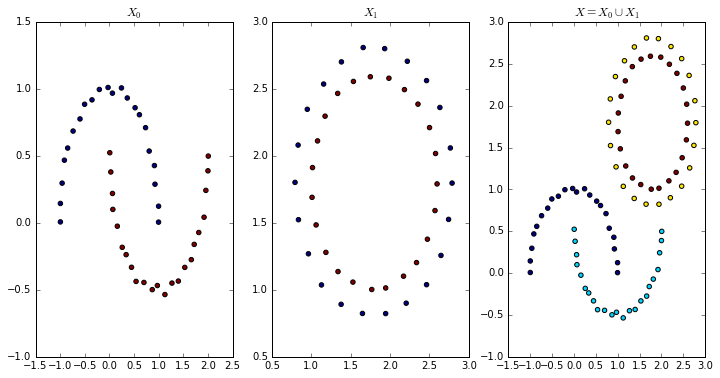

In [403]:
fig, ax = plt.subplots(ncols = 3, figsize = (12,6))
ax[0].scatter(X0[:,0],X0[:,1],c=y0)
ax[1].scatter(X1[:,0],X1[:,1],c=y1)
ax[2].scatter(X[:,0],X[:,1],c=y)
for i,t in enumerate(['$X_0$', "$X_1$", "$X = X_0 \cup X_1$"]): ax[i].set_title(t)

The Rips complex may be obtained simply doing the following. 

TK (Some notes on how to interpret this diagram)

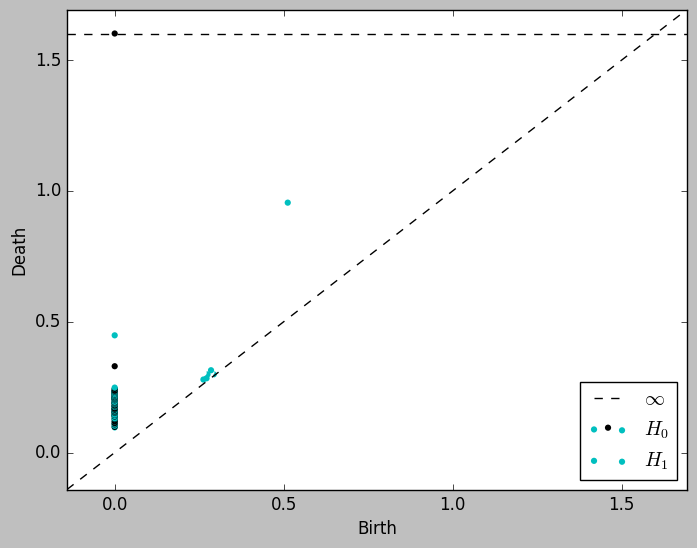

In [404]:
from ripser import ripser, plot_dgms
r = ripser(X,metric='euclidean')
dgms = r['dgms']
plot_dgms(dgms,lifetime = False)

We will be using the idea of *total persistence* as in (Rieck, 2016)

(**this is the tricky part**)

In [405]:
def total_persistence(data, metric = 'euclidean'):
    r = ripser(data,metric=metric)
    pers = 0
    for dgm in r['dgms']:
        pers += np.sum(np.abs(dgm[:-1,1] - dgm[:-1,0])**2) # the very last row always has an inf
    return pers

For example, the persistences of $X_0$ and $X_1$ explain some fraction of the persistence in $X$:

In [406]:
pers0, pers1, pers_total = total_persistence(X0), total_persistence(X1), total_persistence(X)
print("Pers(X1) = {:3.2f}\nPers(X2) = {:3.2f}\nPers(X1+X2) = {:3.2f}\nExplained persistence = {:3.2f}%"\
    .format(pers0, pers1, pers_total,100*(pers0 + pers1)/pers_total))

Pers(X1) = 1.20
Pers(X2) = 2.06
Pers(X1+X2) = 3.71
Explained persistence = 87.82%


The basic idea is to discover some decomposition of $X$ in an unsupervised manner and find how well the persistence of the resulting components explain the full persistence.

I'm first going to choose a clustering method that probably doesn't work well.

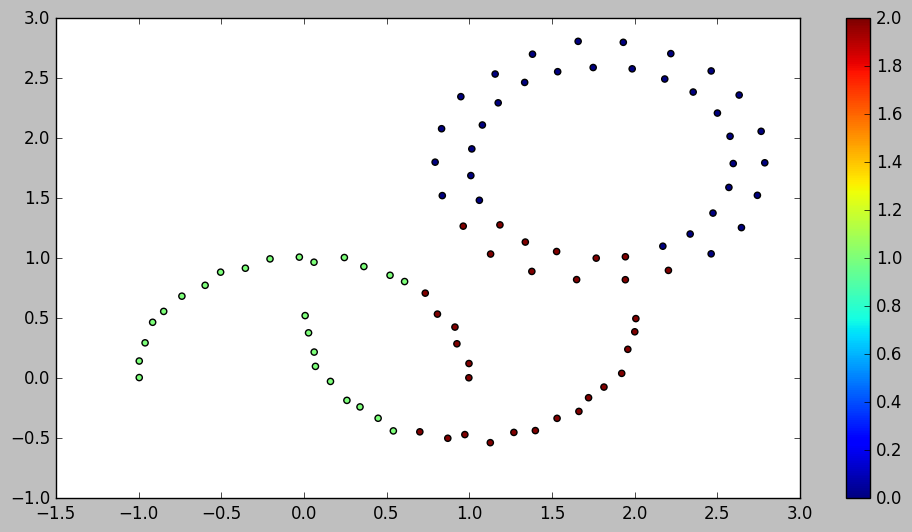

In [407]:
from sklearn.cluster import KMeans
clusterer = KMeans(n_clusters=3)
labels = clusterer.fit_predict(X)

fig, ax = plt.subplots(figsize=(12,6))
sc = ax.scatter(X[:,0],X[:,1], c = labels)
fig.colorbar(sc)

So how well does

In [408]:
def explained_persistence(data,labels, metric = 'euclidean'):
    total = total_persistence(data, metric = metric)
    explained = [total_persistence(X[labels==i], metric) for i in np.unique(labels)]
    plt.bar(np.unique(labels),explained/total)
    return np.sum(explained)/total

0.9635728435249111

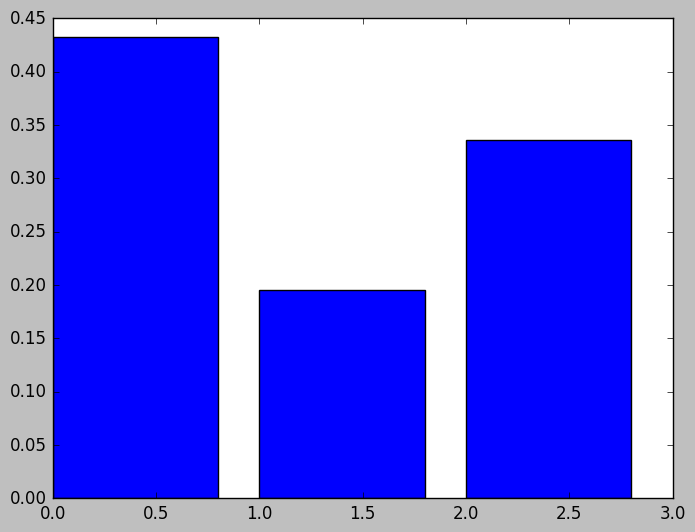

In [409]:
explained_persistence(X, labels)

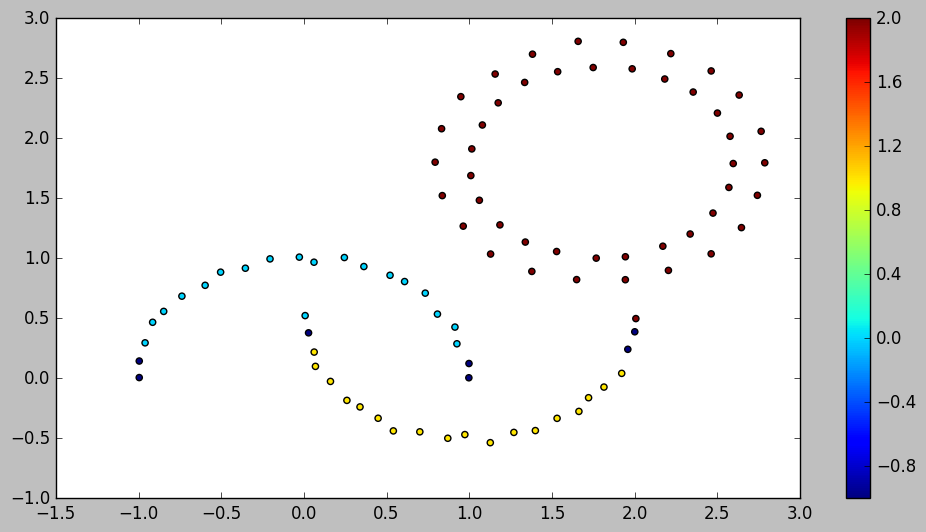

In [410]:
from hdbscan import HDBSCAN

clusterer = HDBSCAN()
labels = clusterer.fit_predict(X)

fig, ax = plt.subplots(figsize=(12,6))
sc = ax.scatter(X[:,0],X[:,1], c = labels)
fig.colorbar(sc)

1.6868085936115689

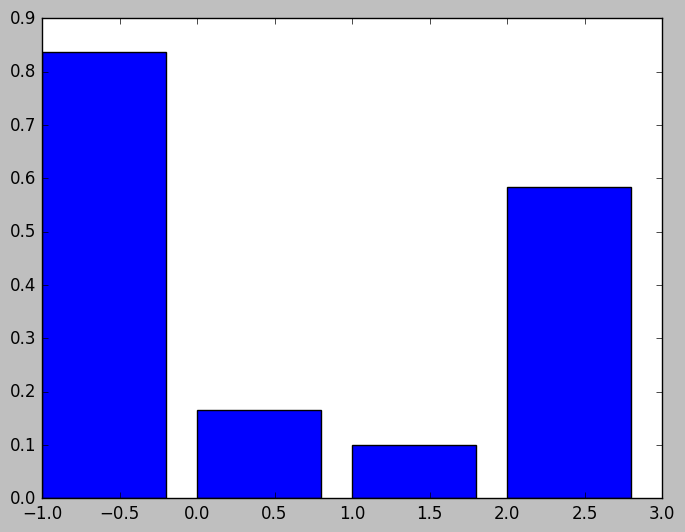

In [411]:
explained_persistence(X, labels)